# A Comprehensive Examination of Statistical Significance in Portfolio Management

In the intricate world of financial markets, portfolio managers continually strive to prove their worth by outperforming standard benchmarks. However, the critical question remains: Is their above-average performance a result of skill or mere coincidence? This notebook employs statistical hypothesis testing to unravel this issue and quantify the number of years needed to validate a manager's skill with a high level of confidence.


## The Cornerstone: Hypothesis Testing

Before diving into specific numbers and calculations, it's imperative to understand the mechanism that allows us to make these determinations: hypothesis testing. This methodology is a cornerstone in the field of inferential statistics, as it provides a structured way to draw conclusions about an entire population based on a sample, which, in the context of portfolio management, could mean the universe of potential investment returns.



## Null and Alternative Hypotheses: The Starting Point

The first step in hypothesis testing is to establish two opposing hypotheses. The Null Hypothesis ($H_0$) serves as our default assumption, suggesting that the portfolio manager's performance does not differ from the market's. The Alternative Hypothesis ($H_1$), on the other hand, posits what we aim to prove: that the manager does indeed outperform the market, with a focus on a performance differential of at least 2%.


## A Critical Statistical Tool: Understanding the Z-Test

Hypothesis testing is a cornerstone of inferential statistics, and the Z-test is particularly invaluable when working with large sample sizes and known standard deviations. In this framework, we rely on the Z-score to quantify how many standard errors a sample statistic is from the population parameter. The Z-score is computed using the formula:

$$
Z = \frac{{\text{Sample Mean} - \text{Population Mean}}}{{\text{Standard Error}}}
$$

Let's delve deeper into the meaning of each term in the equation:

- **Sample Mean**: This represents the average of all the values within the sample, serving as an approximation of the population mean. In the specific context of our portfolio management example, it would pertain to the average annual return of the portfolio under scrutiny.
  
- **Population Mean**: This is the average of all possible values within the entire population. Within the realm of portfolio management, this is generally considered the average return of the market against which the portfolio is being compared.
  
- **Standard Error**: This metric quantifies the expected variability in the sample mean and is calculated as follows:

  $$
  \text{Standard Error} = \frac{{\text{Standard Deviation}}}{{\sqrt{{\text{Sample Size}}}}}
  $$
  
  - **Standard Deviation**: This statistical measure captures the level of dispersion or variability within a data set.
  
  - **Sample Size**: This refers to the total number of observations within the sample. In our case, this would be the number of years of portfolio returns we are analyzing.

In essence, the Z-score provides a standardized measure that tells us how far the sample mean is from the population mean, adjusted for the size of the sample. This helps in making more informed decisions when conducting hypothesis tests.



## Confidence Levels: Building the Framework

Before introducing any specific Z-values, it's crucial to understand what a confidence level is and how it informs our calculations. A confidence level, often set at 95% or 99%, is a statistical measure of the number of times the outcome of an experiment will fall within a specified range. It lays the groundwork for our subsequent calculations and interpretations.


## The Quantile Function: Unveiling the Z-Value

To understand how Z-values are associated with confidence levels, we delve into the mathematical concept known as the quantile function for the standard normal distribution, often termed as the Z-inverse function. This function is the inverse of the cumulative distribution function (CDF). Given a probability $ p $, the Z-inverse function $ Z^{-1}(p) $ tells us the number of standard deviations away from the mean a data point is likely to fall.

In our case, to find the Z-value corresponding to a 95% confidence level, you would look for the Z-value that leaves 2.5% of the distribution in the upper tail. This is calculated as:

$$ Z^{-1}(1-\frac{5}{100} \times \frac{1}{2}) = Z^{-1}(0.975)$$


In [1]:
from scipy.stats import norm

# Calculate the Z-value for a 95% confidence level
z_value_95 = norm.ppf(0.975)
z_value_95


1.959963984540054

After calculating $ Z^{-1}(0.975) $, we find that the Z-value for a 95% confidence level is approximately 1.96. This value is derived from statistical tables or software capable of calculating the Z-inverse function.


## Visualizing the 95% Confidence Interval


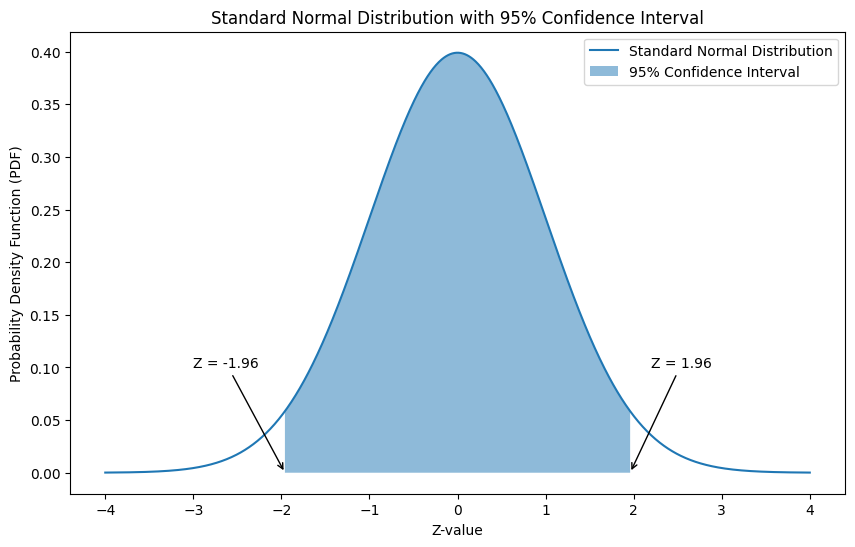

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points for standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Generate data points for shading
x_shade = np.linspace(-1.96, 1.96, 300)
y_shade = norm.pdf(x_shade, 0, 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.title("Standard Normal Distribution with 95% Confidence Interval")
plt.xlabel("Z-value")
plt.ylabel("Probability Density Function (PDF)")

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Add shaded area for 95% confidence interval
plt.fill_between(x_shade, y_shade, alpha=0.5, label='95% Confidence Interval')

# Add annotations
plt.annotate('Z = -1.96', xy=(-1.96, 0), xytext=(-3, 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Z = 1.96', xy=(1.96, 0), xytext=(2.2, 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Add legend
plt.legend()

plt.show()

The plot above shows the standard normal distribution with a shaded area representing the 95% confidence interval. The interval lies between Z-values of -1.96 and 1.96, which are the critical values for a 95% confidence level. The shaded area encapsulates 95% of the data points, leaving 2.5% in each tail.


## Numerical Estimation of $ Z^{-1}(0.975) $

As an alternative to statistical tables or software packages, we can numerically estimate the Z-value corresponding to a 95% confidence level. Using the bisection method, we find that $ Z^{-1}(0.975) $ is approximately the same as the value obtained from statistical packages, confirming its accuracy.



In [3]:
from scipy.optimize import bisect

# Define the function to find the root for
def func(x):
    return norm.cdf(x) - 0.975

# Use bisection method to find Z-value numerically
z_value_numerical = bisect(func, -4, 4)
z_value_numerical


1.9599639845382626

## Assumptions and Preconditions

For the Z-inverse function and, by extension, the Z-test to be valid, certain assumptions must be met:
1. The underlying data should follow a normal distribution, or the sample size should be sufficiently large for the Central Limit Theorem to apply.
2. The population standard deviation should either be known or estimated from a sufficiently large sample. For the portfolio in question, this value is provided as 6%.



## Crunching the Numbers: Calculating the Sample Size

Equipped with the necessary background information, we are now poised to calculate the sample size, which, in the context of portfolio management, translates to the number of years required to statistically affirm the manager's skill. The formula for calculating the sample size is as follows:

$$
\text{Sample Size} = \left( \frac{{Z \times \text{Standard Deviation}}}{{\text{Expected Outperformance}}} \right)^2
$$

Here is a detailed breakdown of each variable in the formula:

- **Z**: This is the Z-value that corresponds to the chosen confidence level. For a confidence level of 95%, we have previously calculated this value to be approximately 1.96.
  
- **Standard Deviation**: This measures the variability or dispersion in the portfolio returns. For our analysis, this is given as 6%.
  
- **Expected Outperformance**: This is essentially the differential between the Sample Mean and the Population Mean, expressed in percentage points. It represents the performance gap between the portfolio and the market that we aim to establish as statistically significant.
  
- **Sample Size**: This represents the number of observations — or in our specific scenario, the number of years of portfolio returns — that are needed to validate the portfolio manager's skill with the chosen level of confidence.

Let's now proceed with the calculations:


In [4]:
# Given values
standard_deviation = 6  # in percentage
expected_outperformance = 2  # in percentage

# Calculate the sample size
sample_size = (z_value_95 * standard_deviation / expected_outperformance) ** 2
sample_size


34.573129386247125

## Conclusion

In the ever-evolving landscape of financial markets, validating a portfolio manager's skill is no small feat. Through the application of statistical hypothesis testing, we discern that a portfolio manager would need to outperform the market for about 35 years to demonstrate skill with a 95% level of confidence. This revelation not only accentuates the challenge of substantiating skill in investment management but also underscores the critical role that statistical rigor plays in the field.

